Using existing sentiment column.

Top 5 Most Polarized Movies:
movie_name
Ashes of Time         1
Burning Silence       1
Chasing Horizons      1
Dreamcatcher          1
Echoes of Tomorrow    1
dtype: int64


<ipython-input-8-e379770a0d30>:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  polarized = df.groupby('movie_name').apply(polarization_score).sort_values(ascending=False).head(5)


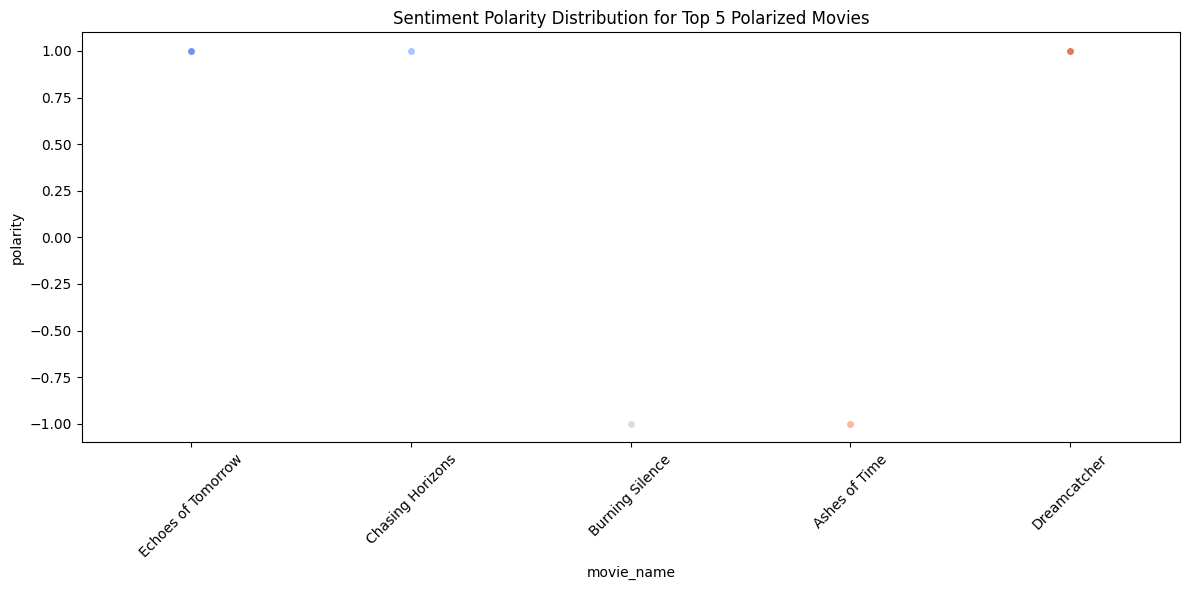

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import os

# Step 1: Load the dataset
df = pd.read_csv("/content/sample_movie_reviews_with_titles.csv")

# Check column names
df.columns = [col.strip().lower() for col in df.columns]
if 'sentiment' not in df.columns:
    print("Sentiment column not found. Performing sentiment analysis...")

    # Step 2: Calculate polarity using TextBlob
    def get_polarity(text):
        return TextBlob(str(text)).sentiment.polarity

    df['polarity'] = df['review'].apply(get_polarity)

    # Label sentiment based on polarity
    def label_sentiment(p):
        if p > 0.1:
            return 'positive'
        elif p < -0.1:
            return 'negative'
        else:
            return 'neutral'

    df['sentiment'] = df['polarity'].apply(label_sentiment)
else:
    print("Using existing sentiment column.")
    if 'polarity' not in df.columns:
        df['polarity'] = df['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Step 3: Find top 5 most polarized movies
def polarization_score(group):
    pos = (group['sentiment'] == 'positive').sum()
    neg = (group['sentiment'] == 'negative').sum()
    return abs(pos - neg)

polarized = df.groupby('movie_name').apply(polarization_score).sort_values(ascending=False).head(5)
print("\nTop 5 Most Polarized Movies:")
print(polarized)

# Step 4: Filter for top polarized movies only
top_movies = polarized.index.tolist()
df_filtered = df[df['movie_name'].isin(top_movies)]

# Step 5: Create and save swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df_filtered, x='movie_name', y='polarity', hue='movie_name', palette="coolwarm", legend=False)
plt.title("Sentiment Polarity Distribution for Top 5 Polarized Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("swarm_plot.png")
plt.show()
